<a href="https://colab.research.google.com/github/ggomez31/ML-Assignments/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize
import io

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Checking for missing values. There are none.

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       284 non-null    int64  
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

In [ ]:
trainData.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,284.000000,284.000000,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,141.500000,14.133384,19.354824,91.96331,656.370423,0.095307,0.102288,0.088245,0.047708,0.180214,0.062251,0.395850,1.221463,2.799136,38.974380,0.007036,0.025967,0.033004,0.011738,0.020623,0.003875,16.248229,25.865739,107.215493,880.827817,0.130850,0.252964,0.276384,0.113469,0.288513,0.083050,0.373239
std,82.127949,3.557272,4.308783,24.44977,353.886842,0.014372,0.050656,0.079657,0.038772,0.026448,0.007089,0.237095,0.534399,1.676412,36.551638,0.003142,0.018662,0.035852,0.006575,0.008063,0.003137,4.883497,6.152410,34.022758,580.281025,0.022626,0.159129,0.217757,0.066945,0.058428,0.018022,0.484519
min,0.000000,6.981000,9.710000,43.79000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,0.114400,0.406400,0.771400,6.802000,0.002838,0.002252,0.000000,0.000000,0.010290,0.000895,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210,0.000000
25%,70.750000,11.807500,16.060000,76.09750,428.675000,0.084668,0.062740,0.029640,0.019603,0.161775,0.057068,0.236450,0.856775,1.667000,17.967500,0.005298,0.012828,0.015030,0.007482,0.015017,0.002225,12.977500,21.382500,83.722500,512.450000,0.114300,0.145325,0.118475,0.062563,0.250300,0.071145,0.000000
50%,141.500000,13.205000,18.945000,85.25000,540.250000,0.094155,0.093435,0.061745,0.033025,0.178300,0.061115,0.327500,1.094000,2.330000,24.950000,0.006302,0.020625,0.026245,0.010850,0.019030,0.003044,14.995000,25.580000,97.665000,683.600000,0.129450,0.211600,0.229800,0.097355,0.280950,0.078650,0.000000
75%,212.250000,16.132500,21.825000,106.45000,799.100000,0.104825,0.127975,0.127700,0.070468,0.194425,0.065410,0.476050,1.478500,3.274000,44.467500,0.007989,0.033247,0.040697,0.014672,0.024202,0.004328,18.247500,30.127500,124.475000,1031.250000,0.144550,0.321725,0.386550,0.162925,0.311575,0.091482,1.000000
max,283.000000,27.220000,32.470000,182.10000,2250.000000,0.163400,0.286700,0.426800,0.201200,0.274300,0.095020,1.509000,3.896000,9.807000,233.000000,0.031130,0.106400,0.396000,0.052790,0.061460,0.029840,33.130000,47.160000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.286700,0.577400,0.207500,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


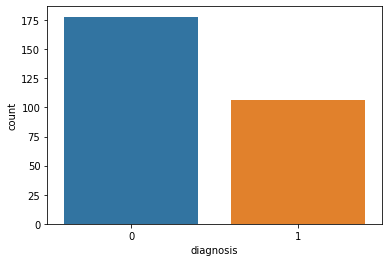

In [ ]:
sns.countplot(trainData.diagnosis)

Viewing Boxplot to visualize any outliers.

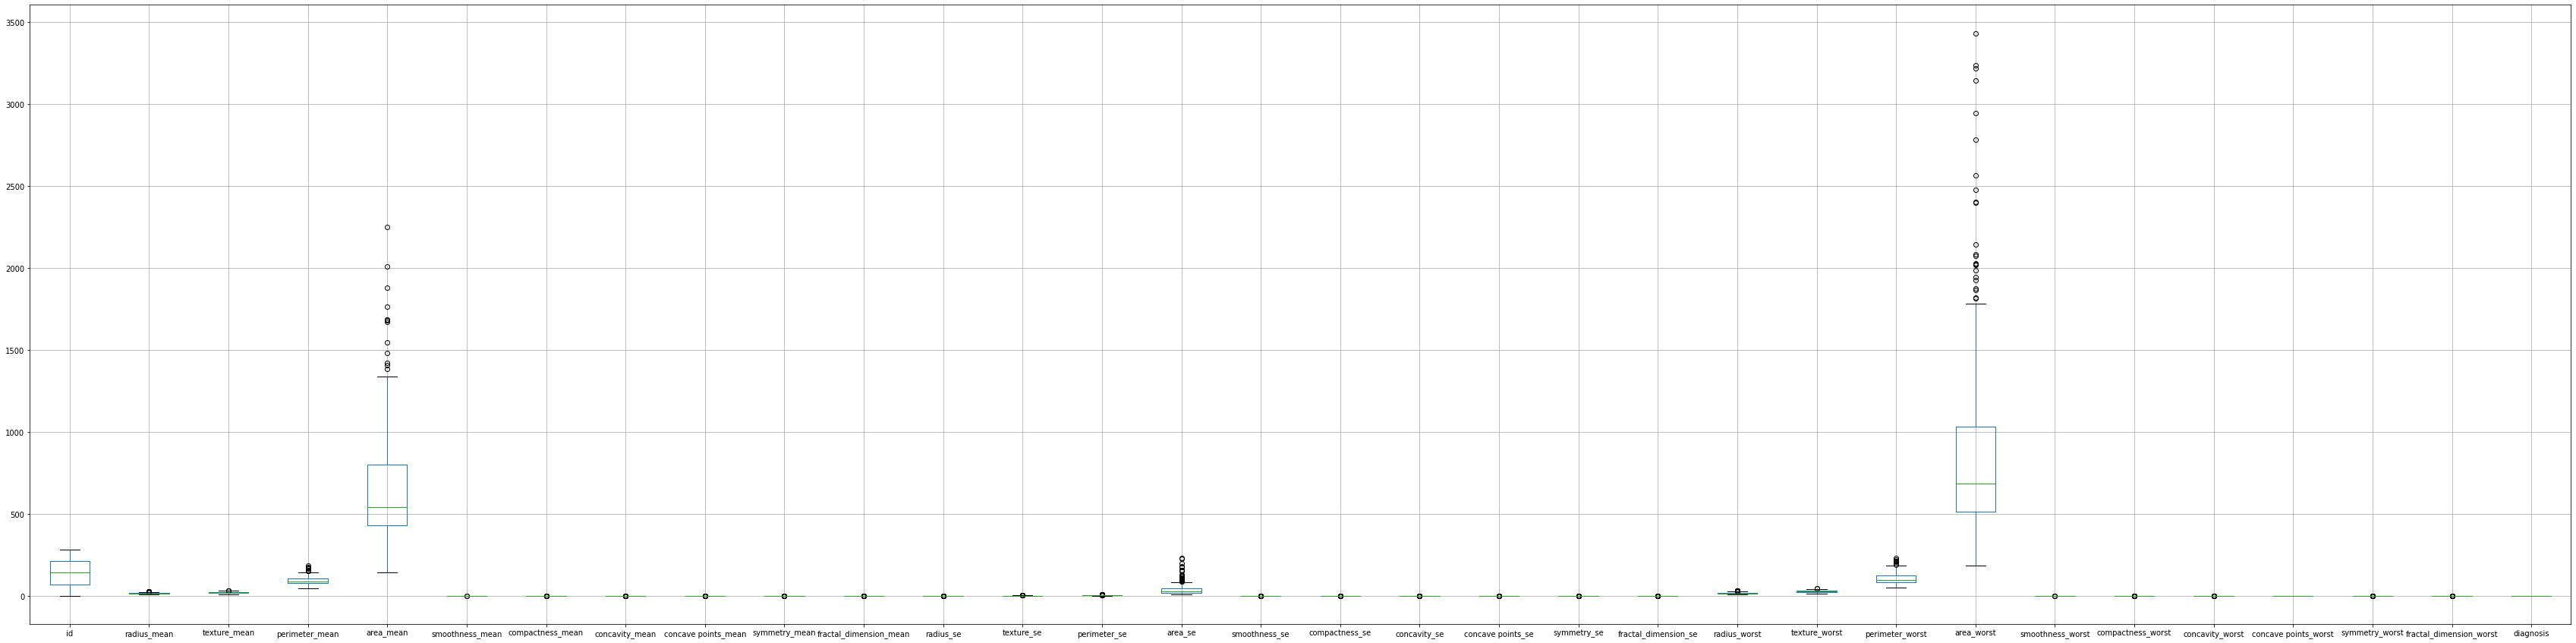

In [ ]:
trainData.boxplot(figsize=(60,15))
plt.show()

Viewing total number of Outliers in each column. "True" means the presence of an outlier.

In [ ]:
def getOutliers(trainData):  
    Q1 = trainData.quantile(0.15)
    Q3 = trainData.quantile(0.85)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    res = ((trainData < (lower)) | (trainData > (upper)))
    for i in range(res.shape[1]):
      print(res.iloc[:,i].value_counts())

In [ ]:
getOutliers(trainData)

False    284
Name: id, dtype: int64
False    284
Name: radius_mean, dtype: int64
False    284
Name: texture_mean, dtype: int64
False    284
Name: perimeter_mean, dtype: int64
False    283
True       1
Name: area_mean, dtype: int64
False    283
True       1
Name: smoothness_mean, dtype: int64
False    284
Name: compactness_mean, dtype: int64
False    282
True       2
Name: concavity_mean, dtype: int64
False    284
Name: concave points_mean, dtype: int64
False    284
Name: symmetry_mean, dtype: int64
False    281
True       3
Name: fractal_dimension_mean, dtype: int64
False    280
True       4
Name: radius_se, dtype: int64
False    281
True       3
Name: texture_se, dtype: int64
False    279
True       5
Name: perimeter_se, dtype: int64
False    275
True       9
Name: area_se, dtype: int64
False    280
True       4
Name: smoothness_se, dtype: int64
False    276
True       8
Name: compactness_se, dtype: int64
False    278
True       6
Name: concavity_se, dtype: int64
False    280
True    

To get my model past the benchmark, I decided to remove outliers using the IQR method. I decided to use 85% and 15% quantiles due to the 75% and 25% quantiles removing too many observations and not improving my model's performance scores.

In [ ]:
def removeOutliers(X_train, y_train):
    X_train['diagnosis'] = y_train

    Q1 = X_train.quantile(0.15)
    Q3 = X_train.quantile(0.85)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    X_train = X_train[~((X_train < (lower)) | (X_train > (upper))).any(axis=1)]

    y_train = X_train['diagnosis']
    X_train = X_train.drop(X_train.columns[[30]], axis=1)
    return X_train, y_train

I deemed normalization or standardization of the data not necessary for Naive Bayes Models since they do not affect the outcome of the models.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainData.drop(trainData.columns[[0,31]], axis=1), trainData.diagnosis, stratify=trainData.diagnosis, test_size=0.1)

In [ ]:
X_train, y_train = removeOutliers(X_train, y_train)

# ComplementNB Basic Model

In [ ]:
CNB = ComplementNB()
CNB.fit(X_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [ ]:
y_pred = CNB.predict(X_train)
y_pred_proba = CNB.predict_proba(X_train)[:,1]

print("CNB Train ROC AUC Score: {:.10f}".format(roc_auc_score(y_train, y_pred_proba)))
print("CNB Train Accuracy Score: {:.10f}".format(accuracy_score(y_train, y_pred)))
print("CNB Train F1 Score: {:.10f}".format(f1_score(y_train, y_pred)))

CNB Train ROC AUC Score: 0.9388239591
CNB Train Accuracy Score: 0.8648648649
CNB Train F1 Score: 0.7794117647


In [ ]:
y_pred = CNB.predict(X_test)
y_pred_proba = CNB.predict_proba(X_test)[:,1]

print("CNB Test ROC AUC Score: {:.10f}".format(roc_auc_score(y_test, y_pred_proba)))
print("CNB Test Accuracy Score: {:.10f}".format(accuracy_score(y_test, y_pred)))
print("CNB Test F1 Score: {:.10f}".format(f1_score(y_test, y_pred)))

CNB Test ROC AUC Score: 0.8686868687
CNB Test Accuracy Score: 0.8965517241
CNB Test F1 Score: 0.8421052632


# ComplementNB Basic Model Distribution

In [ ]:
train_roc_auc = []
train_acc = []
train_f1 = []

test_roc_auc = []
test_acc = []
test_f1 = []

for i in range(200):
  X_train_loop, X_test_loop, y_train_loop, y_test_loop = train_test_split(trainData.drop(trainData.columns[[0,31]], axis=1), trainData.diagnosis, stratify=trainData.diagnosis, test_size=0.15)

  CNB = ComplementNB()
  CNB.fit(X_train_loop, y_train_loop)

  y_pred = CNB.predict(X_train_loop)
  y_pred_proba = CNB.predict_proba(X_train_loop)[:,1]

  train_roc_auc.append(roc_auc_score(y_train_loop, y_pred_proba))
  train_acc.append(accuracy_score(y_train_loop, y_pred))
  train_f1.append(f1_score(y_train_loop, y_pred))

  y_pred = CNB.predict(X_test_loop)
  y_pred_proba = CNB.predict_proba(X_test_loop)[:,1]

  test_roc_auc.append(roc_auc_score(y_test_loop, y_pred_proba))
  test_acc.append(accuracy_score(y_test_loop, y_pred))
  test_f1.append(f1_score(y_test_loop, y_pred))

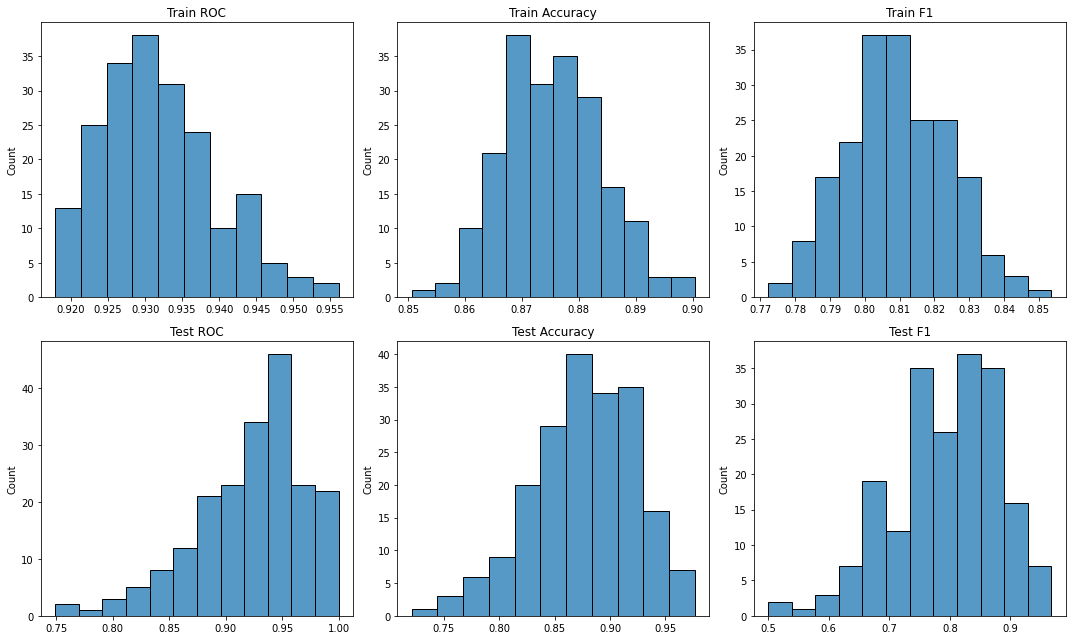

In [ ]:
f, axs = plt.subplots(2, 3, figsize=(15,9))
axs[0,0].set_title("Train ROC")
axs[0,1].set_title("Train Accuracy")
axs[0,2].set_title("Train F1")
axs[1,0].set_title("Test ROC")
axs[1,1].set_title("Test Accuracy")
axs[1,2].set_title("Test F1")
sns.histplot(train_roc_auc, ax=axs[0,0]);
sns.histplot(train_acc, ax=axs[0,1]);
sns.histplot(train_f1, ax=axs[0,2]);
sns.histplot(test_roc_auc, ax=axs[1,0]);
sns.histplot(test_acc, ax=axs[1,1]);
sns.histplot(test_f1, ax=axs[1,2]);
f.tight_layout()

# GaussianNB Basic Model

In [ ]:
GNB_basic = GaussianNB()
GNB_basic.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = GNB_basic.predict(X_train)
y_pred_proba = GNB_basic.predict_proba(X_train)[:,1]

print("GNB Train ROC AUC Score: {:.10f}".format(roc_auc_score(y_train, y_pred_proba)))
print("GNB Train Accuracy Score: {:.10f}".format(accuracy_score(y_train, y_pred)))
print("GNB Train F1 Score: {:.10f}".format(f1_score(y_train, y_pred)))

GNB Train ROC AUC Score: 0.9879474069
GNB Train Accuracy Score: 0.9369369369
GNB Train F1 Score: 0.9054054054


In [ ]:
y_pred = GNB_basic.predict(X_test)
y_pred_proba = GNB_basic.predict_proba(X_test)[:,1]

print("GNB Test ROC AUC Score: {:.10f}".format(roc_auc_score(y_test, y_pred_proba)))
print("GNB Test Accuracy Score: {:.10f}".format(accuracy_score(y_test, y_pred)))
print("GNB Test F1 Score: {:.10f}".format(f1_score(y_test, y_pred)))

GNB Test ROC AUC Score: 0.9797979798
GNB Test Accuracy Score: 0.9655172414
GNB Test F1 Score: 0.9523809524


# GaussianNB Basic Model Distribution

In [ ]:
train_roc_auc = []
train_acc = []
train_f1 = []

test_roc_auc = []
test_acc = []
test_f1 = []

for i in range(200):
  X_train_loop, X_test_loop, y_train_loop, y_test_loop = train_test_split(trainData.drop(trainData.columns[[0,31]], axis=1), trainData.diagnosis, stratify=trainData.diagnosis, test_size=0.1)
  X_train_loop, y_train_loop = removeOutliers(X_train_loop, y_train_loop)

  GNB = GaussianNB()
  GNB.fit(X_train_loop, y_train_loop)

  y_pred = GNB.predict(X_train_loop)
  y_pred_proba = GNB.predict_proba(X_train_loop)[:,1]

  train_roc_auc.append(roc_auc_score(y_train_loop, y_pred_proba))
  train_acc.append(accuracy_score(y_train_loop, y_pred))
  train_f1.append(f1_score(y_train_loop, y_pred))

  y_pred = GNB.predict(X_test_loop)
  y_pred_proba = GNB.predict_proba(X_test_loop)[:,1]

  test_roc_auc.append(roc_auc_score(y_test_loop, y_pred_proba))
  test_acc.append(accuracy_score(y_test_loop, y_pred))
  test_f1.append(f1_score(y_test_loop, y_pred))


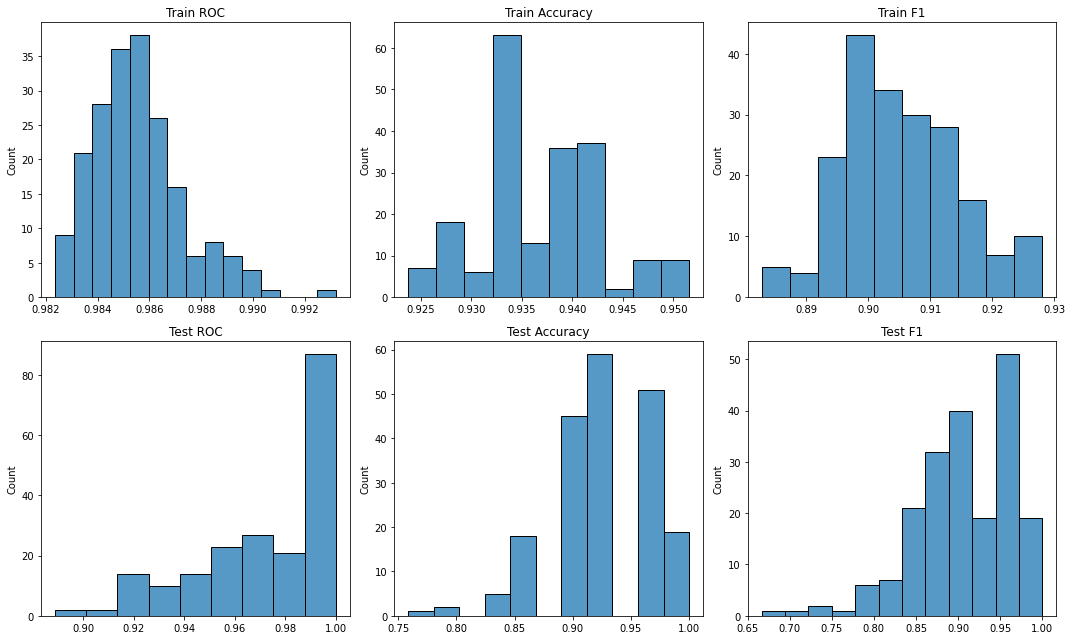

In [ ]:
f, axs = plt.subplots(2, 3, figsize=(15,9))
axs[0,0].set_title("Train ROC")
axs[0,1].set_title("Train Accuracy")
axs[0,2].set_title("Train F1")
axs[1,0].set_title("Test ROC")
axs[1,1].set_title("Test Accuracy")
axs[1,2].set_title("Test F1")
sns.histplot(train_roc_auc, ax=axs[0,0]);
sns.histplot(train_acc, ax=axs[0,1]);
sns.histplot(train_f1, ax=axs[0,2]);
sns.histplot(test_roc_auc, ax=axs[1,0]);
sns.histplot(test_acc, ax=axs[1,1]);
sns.histplot(test_f1, ax=axs[1,2]);
f.tight_layout()

# GaussianNB Best Model

In [ ]:
cv = StratifiedKFold(n_splits=10)
smoothing = {'var_smoothing':np.logspace(-8,-9, num=800)}
GNB_best = GridSearchCV(GaussianNB(), param_grid=smoothing, n_jobs=-1, cv=cv, scoring='f1')
GNB_best.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-08, 9.95396231e-09, 9.90813657e-09, 9.86252179e-09,
       9.81711702e-09, 9.77192128e-09, 9.72693362e-09, 9.68215306e-09,
       9.63757866e-09, 9.5932...
       1.09163173e-09, 1.08660611e-09, 1.08160363e-09, 1.07662418e-09,
       1.07166765e-09, 1.06673394e-09, 1.06182294e-09, 1.05693455e-09,
       1.05206867e-09, 1.04722519e-09, 1.04240401e-09, 1.03760502e-09,
       1.03282813e-09, 1.02807322e-09, 1.02334021e-09, 1.01862899e-09,
       1.01393946e-09, 1.00927151e-09, 1.00462506e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
GNB_best.best_estimator_

GaussianNB(priors=None, var_smoothing=4.89078709413959e-09)

In [ ]:
GNB_best.best_score_

0.914606047547224

In [ ]:
y_pred = GNB_best.predict(X_train)
y_pred_proba = GNB_best.predict_proba(X_train)[:,1]

print("GNB Train ROC AUC Score: {:.10f}".format(roc_auc_score(y_train, y_pred_proba)))
print("GNB Train Accuracy Score: {:.10f}".format(accuracy_score(y_train, y_pred)))
print("GNB Train F1 Score: {:.10f}".format(f1_score(y_train, y_pred)))

GNB Train ROC AUC Score: 0.9870343316
GNB Train Accuracy Score: 0.9459459459
GNB Train F1 Score: 0.9189189189


In [ ]:
y_pred = GNB_best.predict(X_test)
y_pred_proba = GNB_best.predict_proba(X_test)[:,1]

print("GNB Test ROC AUC Score: {:.10f}".format(roc_auc_score(y_test, y_pred_proba)))
print("GNB Test Accuracy Score: {:.10f}".format(accuracy_score(y_test, y_pred)))
print("GNB Test F1 Score: {:.10f}".format(f1_score(y_test, y_pred)))

GNB Test ROC AUC Score: 0.9747474747
GNB Test Accuracy Score: 0.9310344828
GNB Test F1 Score: 0.9090909091


# GaussianNB Best Model Distribution

In [ ]:
train_roc_auc = []
train_acc = []
train_f1 = []

test_roc_auc = []
test_acc = []
test_f1 = []

for i in range(200):
  X_train_loop, X_test_loop, y_train_loop, y_test_loop = train_test_split(trainData.drop(trainData.columns[[0,31]], axis=1), trainData.diagnosis, stratify=trainData.diagnosis, test_size=0.1)
  X_train_loop, y_train_loop = removeOutliers(X_train_loop, y_train_loop)
  
  GNB = GaussianNB(var_smoothing=4.89078709413959e-09)
  GNB.fit(X_train_loop, y_train_loop)

  y_pred = GNB.predict(X_train_loop)
  y_pred_proba = GNB.predict_proba(X_train_loop)[:,1]

  train_roc_auc.append(roc_auc_score(y_train_loop, y_pred_proba))
  train_acc.append(accuracy_score(y_train_loop, y_pred))
  train_f1.append(f1_score(y_train_loop, y_pred))

  y_pred = GNB.predict(X_test_loop)
  y_pred_proba = GNB.predict_proba(X_test_loop)[:,1]

  test_roc_auc.append(roc_auc_score(y_test_loop, y_pred_proba))
  test_acc.append(accuracy_score(y_test_loop, y_pred))
  test_f1.append(f1_score(y_test_loop, y_pred))

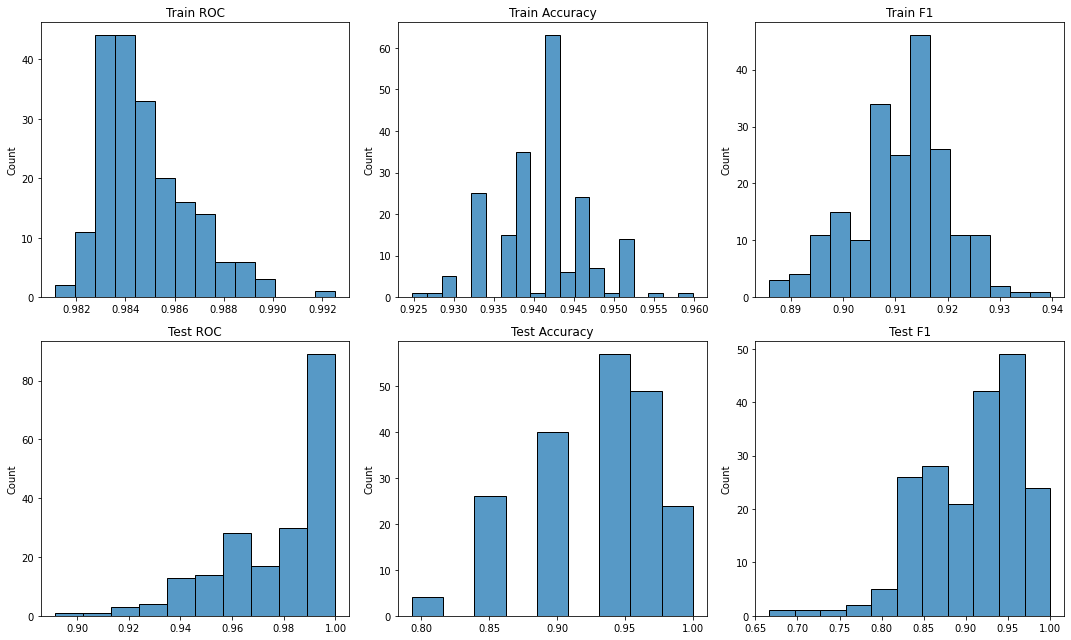

In [ ]:
f, axs = plt.subplots(2, 3, figsize=(15,9))
axs[0,0].set_title("Train ROC")
axs[0,1].set_title("Train Accuracy")
axs[0,2].set_title("Train F1")
axs[1,0].set_title("Test ROC")
axs[1,1].set_title("Test Accuracy")
axs[1,2].set_title("Test F1")
sns.histplot(train_roc_auc, ax=axs[0,0]);
sns.histplot(train_acc, ax=axs[0,1]);
sns.histplot(train_f1, ax=axs[0,2]);
sns.histplot(test_roc_auc, ax=axs[1,0]);
sns.histplot(test_acc, ax=axs[1,1]);
sns.histplot(test_f1, ax=axs[1,2]);
f.tight_layout()

# Predicting Actual Test Set With GaussianNB (Explanation)

The reason why GaussianNB performs better than the other Naive Bayes Model's on this dataset is because GaussianNB is suited for continuous features. So when I train my model to fit this dataset, it calculates the mean and standard deviation of each column given a diagnosis to form a normal (gaussian) distribition of each feature.  Since the GaussianNB assumes that the continuous features in my dataset are normally distributed, this results in having strong evaluation scores for my model.

In [ ]:
X_real_test = testData.drop(trainData.columns[[0]], axis=1)

In [ ]:
y_pred = GNB_best.predict(X_real_test)

In [ ]:
y_pred.tolist()

In [ ]:
ans = {'id': testData.id, 'diagnosis': y_pred.tolist()}
df = pd.DataFrame(ans)
df.to_csv('assignment3.csv', index=False)
df